## ICPC Archive 7619 - Guessing the Dice Roll
> There are N players playing a guessing game. Each player guesses a sequence consists of $\{1,2,3,4,5,6\}$ with length L, then a dice will be rolled again and again and the roll out sequence will be recorded. The player whose guessing sequence first matches the last L rolls of the dice wins the game.
> output the winning probability of each player with the precision of 6 digits.
> Full problem link: https://icpcarchive.ecs.baylor.edu/index.php?option=com_onlinejudge&Itemid=8&category=766&page=show_problem&problem=5641

In [24]:
import numpy as np
import pandas as pd

## Markov chain -- solving a linear system

In [25]:
def get_prefixs(s):
    '''
        Get all possible prefixs of sequences s as conditions
    '''
    count = 1
    prefix_dict = {None: 0}
    for t in s:
        for i in range(len(t)-1):
            if tuple(t[0:i+1]) not in prefix_dict:
                prefix_dict[tuple(t[:i+1])] = count
                count+=1
    return prefix_dict

In [26]:
def compute_coef(prefix_dict, s, k):
    '''
        Compute the winning probability for player k
    '''

    c = None
    A = []
    b = []
    m = len(prefix_dict)

    for d,v in prefix_dict.items():
        coefs = [0 for _ in range(m)]
        v = 0

        for i in range(1,7):
            if d==None:
                t = [i]
            else:
                t = list(d)+[i]

            if t==s[k]:
                v += 1.0/6

            elif t not in s:   
                pos = 0
                while (pos<len(t)) and (tuple(t[pos:]) not in prefix_dict):
                    pos += 1

                if pos == len(t):
                    t = None
                else:
                    t = tuple(t[pos:])

                coefs[prefix_dict[t]] += 1.0/6

        A.append(coefs)
        b.append(v)
    return A,b

In [27]:
def runner(s):
    prefix_dict = get_prefixs(s)
    m = len(prefix_dict)
    res = []
    for i in range(len(s)):
        A,b = compute_coef(prefix_dict, s, i)
        sol = np.linalg.solve(np.eye(m) - A, b)
        res.append(np.round(sol[0],6))
    return res

In [28]:
res = runner([[1,2,3],[2,3,4],[3,4,5],[4,5,6]])

In [29]:
res

[0.285337, 0.237781, 0.237781, 0.239102]

## Simulation

In [30]:
def get_freq(n, s):
    plot_res = pd.DataFrame(columns=s+['sample_size'])
    r = np.random.randint(low=1, high=n+1, size=pow(10,7))
    res = {tuple(i):0 for i in s}
    m = len(s[0])
    i = m
    while (i<=len(r)):
        t = tuple(r[i-m:i])
        if t in res:
            res[t] += 1
            i = i+m
            if sum(res.values())%20==0:
                win_prob = {}
                for t in s:
                    win_prob[tuple(t)] = (res[tuple(t)]*1.0/sum(res.values()))
                win_prob['sample_size'] = sum(res.values())
                plot_res = plot_res.append(win_prob, ignore_index=True)
        else:
            i = i+1
        
    return res,plot_res

In [32]:
res,plot_res = get_freq(n=6,s=[(1,2,3),(2,3,4),(3,4,5),(4,5,6)])

In [33]:
plot_res.columns = ['A', 'B', 'C', 'D', 'sample_size']

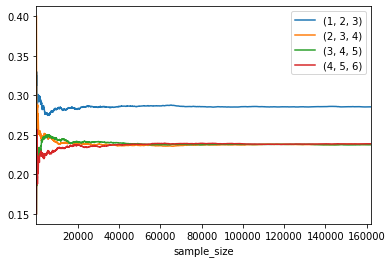

In [34]:
ax = plot_res.plot(x='sample_size', y='A')
plot_res.plot(x='sample_size', y='B', ax=ax)
plot_res.plot(x='sample_size', y='C', ax=ax)
plot_res.plot(x='sample_size', y='D', ax=ax)
ax.legend([(1,2,3), (2,3,4), (3,4,5), (4,5,6)])